# Introduction

<div class="alert alert-block alert-info">
<ul>
    <li> <b>Dataset #3: </b|> Text Dataset => Classify Different Reviews </li>
    <li> <b> Source: Trip Advisor Reviews</b>  </li> 
    <li> <a> (https://www.kaggle.com/andrewmvd/trip-advisor-hotel-reviews) </a> </li>
    <li> Reviews from 1-5 </li>
    <li> <b> Test Data is not seperate from Train Data </b></li>
</div>

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import pyplot
import seaborn as sns
from sklearn import preprocessing as sklpp
from sklearn import decomposition as skldecomp
from sklearn import model_selection as sklms
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

In [2]:
directory = '../datasets/trip_data/tripadvisor_hotel_reviews.csv'

In [3]:
data = pd.read_csv(directory)

In [4]:
data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


# a) Data Exploration

In [5]:
counts = data.groupby(['Rating']).count()
counts

,Review
Rating,
1,1421
2,1793
3,2184
4,6039
5,9054


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


 Data only has 2 columns, will need to extract out using some source of vectorizer for the text data

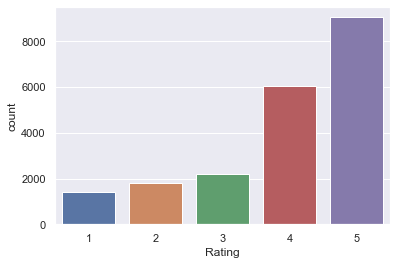

In [7]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Rating", data=data)

# might be a big problem, so ill train and then redo if its too biased

 - The data distribution is very spread out, and there are far too many samples for 5 comparatively than for any other rating. One strategy can be to even out the data distribution, which is what I will do.

# b) Pre-Processing

In [8]:
# Average review length
sample_size=1000
break_down = data.groupby(['Rating'], as_index=False).apply(lambda x: x.sample(sample_size)).reset_index()
data_text = break_down

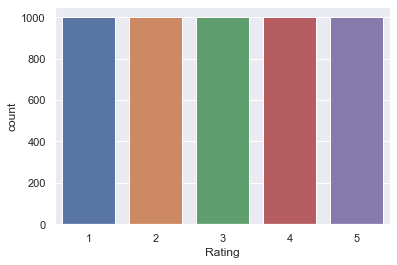

In [9]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Rating", data=data_text)

 - Drawbacks - Might not be a good estimate for real world if this is actually what people tend to do (Give rating if service is really good)
This dataset has a decent amount of difference in terms of how many reviews there are. I think i might end up combining 1,2,3 to have a rating, a 4 to be one group and 5 to be seperate

# b/c PreProcess/Feature Learning

In [10]:
vectorizer = TfidfVectorizer(encoding='utf-8', sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1, 2))
vectors = vectorizer.fit_transform(data_text['Review'])
X = vectors.toarray()
Y = data_text['Rating']
X.shape

(5000, 18881)

`TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', 
                             encoding='latin-1', ngram_range=(1, 2), stop_words='english')`

Justification/What it does:
- TfidVectorizer, takes in the data/text and applies inverse document frequency weighting 
- Solves problem of each world holding same wieght, so it scales the weight
- Vectorizer combines the Count (convert text documents to a matrix of token counts) and then TFidf Transformer (applies weights) 
- TFid gets you two real value vectors 

- Parameters
    - sublinear_tf -> if one document has multiple occurences of same word, setting this to true gives a specific weight to how many documents it came to
    -min_df => if word is not in atleast 5 documents, ignore it 
    - norm = 'l2' setting the norm of each cosine simlarity
    - encoding
    -ngram_range -> how many words can be grouped together


https://nlp.stanford.edu/IR-book/html/htmledition/sublinear-tf-scaling-1.html
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer
https://janav.wordpress.com/2013/10/27/tf-idf-and-cosine-similarity/

# Further Data Exploration

In [11]:
vectorizer.get_feature_names()

['00',
 '00 00',
 '00 30',
 '00 day',
 '00 dollars',
 '00 morning',
 '00 night',
 '00 no',
 '00 not',
 '00 person',
 '00 pm',
 '00 room',
 '00 said',
 '000',
 '00am',
 '00pm',
 '01',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '10',
 '10 00',
 '10 10',
 '10 11',
 '10 12',
 '10 13',
 '10 15',
 '10 20',
 '10 30',
 '10 30pm',
 '10 blocks',
 '10 day',
 '10 days',
 '10 dollars',
 '10 euro',
 '10 euros',
 '10 feet',
 '10 hours',
 '10 min',
 '10 mins',
 '10 minute',
 '10 minutes',
 '10 night',
 '10 nights',
 '10 people',
 '10 person',
 '10 pm',
 '10 year',
 '10 years',
 '100',
 '100 feet',
 '100 night',
 '1000',
 '101',
 '109',
 '10am',
 '10min',
 '10mins',
 '10pm',
 '10th',
 '10th floor',
 '11',
 '11 00',
 '11 00am',
 '11 00pm',
 '11 13',
 '11 18',
 '11 30',
 '11 30am',
 '11 30pm',
 '11 days',
 '11 pm',
 '11 year',
 '110',
 '112',
 '115',
 '11am',
 '11pm',
 '11th',
 '11th floor',
 '12',
 '12 00',
 '12 10',
 '12 15',
 '12 30',
 '12 euros',
 '12 hour',
 '12 hours',
 '12 noon',
 '120',
 '120 eur

# 

# d) Machine Learning Methods

# i) Linear SVC

In [12]:
k_folds = 5
test_data_folds = []
train_data_folds = []
validation_data_folds = []

kf = sklms.KFold(n_splits=5, shuffle=True)
kf.get_n_splits(X)
c_vals = [0.01, 0.5, 1.0, 1.5, 2.0]
counter = 0

linear_svc_values = []
for train_index, validation_index in kf.split(X):
    
    # SPLITTING LOGIC
    X_train, X_test = X[train_index], X[validation_index]
    Y_train, Y_test = Y[train_index], Y[validation_index]
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=1)
    test_data_folds.append((X_test, Y_test))
    train_data_folds.append((X_train, Y_train))
    validation_data_folds.append((X_val, Y_val))
    
    # MODEL TRAINING
    linear_svc = svm.LinearSVC(C=c_vals[counter], loss='hinge', multi_class='ovr')
    linear_svc.fit(X_train, Y_train)
    
    # VALIDATION RESULTS
    predicted = linear_svc.predict(X_val)
    confu_matrix = confusion_matrix(Y_val, predicted)
    accuracy = accuracy_score(Y_val, predicted)
    linear_svc_values.append((accuracy, c_vals[counter]))
    print(f'Iteration {counter + 1} with C: {c_vals[counter]} Complete')
    print(f'Accuracy : {accuracy}')
    
    counter += 1

Iteration 1 with C: 0.01 Complete
Accuracy : 0.51
Iteration 2 with C: 0.5 Complete
Accuracy : 0.53
Iteration 3 with C: 1.0 Complete
Accuracy : 0.5141666666666667
Iteration 4 with C: 1.5 Complete
Accuracy : 0.5025
Iteration 5 with C: 2.0 Complete
Accuracy : 0.5075


**SVC NOTES**

`svm.LinearSVC(C=c_vals[counter], loss='hinge', multi_class='ovr')`
- For the classifier => dual formulation because n samples >>>>> n features
- Since num features > num samples, we can keep dual true
- For multi-class I used 'ovr' to specify the one vs rest strategy so it runs # of classes time to classify
- loss func i kept it hinge

In [13]:
accuracy, best_c = max(linear_svc_values, key = lambda i : i[0])
print(f'Best Accuracy: {accuracy}\nBest C(Penalty Term) : {best_c}')

Best Accuracy: 0.53
Best C(Penalty Term) : 0.5


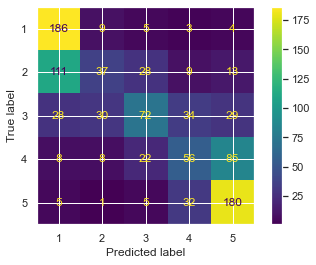

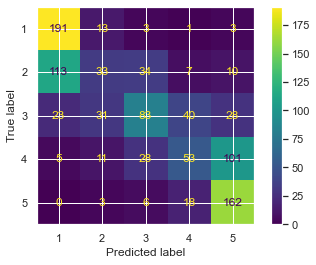

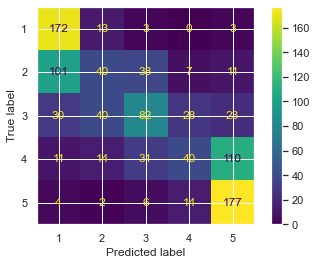

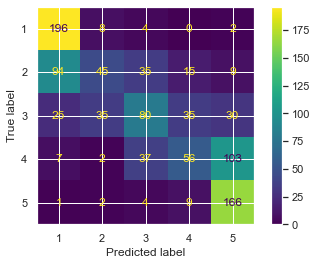

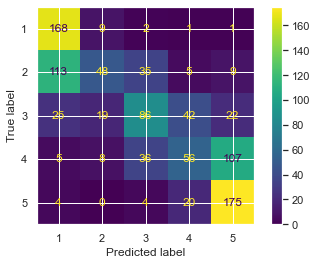

Average Accuracy: 0.528


In [14]:
# Fit model using all the training fold and validation fold

tot_accuracy = []
counter = 0

for i in range(0,5):
    X_train = np.concatenate((train_data_folds[i][0], validation_data_folds[i][0]), axis= 0)
    Y_train = np.concatenate((train_data_folds[i][1], validation_data_folds[i][1]), axis= 0)
    X_test = test_data_folds[i][0]
    Y_test = test_data_folds[i][1]
    
    # Learn using the other two folds not used for testing 
    linear_svc = svm.LinearSVC(C=best_c, loss='hinge', multi_class='ovr')
    linear_svc.fit(X_train, Y_train)
    
    predicted = linear_svc.predict(X_test)
    accuracy = accuracy_score(Y_test, predicted)
    
    tot_accuracy.append(accuracy)
    
    # Graph Confusion Matrix for Each Run:
    disp = plot_confusion_matrix(linear_svc, X_test, Y_test, display_labels=[1,2,3,4,5])
    pyplot.show()
    counter += 1
    
linear_svc_accuracy = sum(tot_accuracy)/len(tot_accuracy)
print(f'Average Accuracy: {sum(tot_accuracy)/len(tot_accuracy)}')

# ii) MultiNomial NB

In [15]:
k_folds = 5
test_data_folds = []
train_data_folds = []
validation_data_folds = []

kf = sklms.KFold(n_splits=5, shuffle=True)
kf.get_n_splits(X)
alpha_vals = [1, 1.5, 2, 2.5, 3, 3.5]
counter = 0

mnnb_values = []
for train_index, validation_index in kf.split(X):
    
    # SPLITTING LOGIC
    X_train, X_test = X[train_index], X[validation_index]
    Y_train, Y_test = Y[train_index], Y[validation_index]
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=1)
    test_data_folds.append((X_test, Y_test))
    train_data_folds.append((X_train, Y_train))
    validation_data_folds.append((X_val, Y_val))
    
    # MODEL TRAINING
    mnnb = MultinomialNB(alpha=alpha_vals[counter], fit_prior=True, class_prior=None)
    mnnb.fit(X_train, Y_train)
    
    # VALIDATION RESULTS
    predicted = mnnb.predict(X_val)
    confu_matrix = confusion_matrix(Y_val, predicted)
    accuracy = accuracy_score(Y_val, predicted)
    mnnb_values.append((accuracy, c_vals[counter]))
    print(f'Iteration {counter + 1} with C: {c_vals[counter]} Complete')
    print(f'Accuracy : {accuracy}')
    
    counter += 1

Iteration 1 with C: 0.01 Complete
Accuracy : 0.5425
Iteration 2 with C: 0.5 Complete
Accuracy : 0.5641666666666667
Iteration 3 with C: 1.0 Complete
Accuracy : 0.5166666666666667
Iteration 4 with C: 1.5 Complete
Accuracy : 0.525
Iteration 5 with C: 2.0 Complete
Accuracy : 0.5416666666666666


**MNNB NOTES** (https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes)

WHY I PICKED: 
    Assuming conditional independence between every pair of features -> eac
w
`MultinomialNB(alpha=alpha_vals[counter], fit_prior=True, class_prior=None)`
- alpha - fit the different alpha vals
- fit_prior -> Since i took out some values of data myself, no need to fit

In [22]:
accuracy, best_alpha = max(mnnb_values, key = lambda i : i[0])
print(f'Best Accuracy: {accuracy}\nBest alpha : {best_alpha}')

Best Accuracy: 0.5641666666666667
Best alpha : 0.5


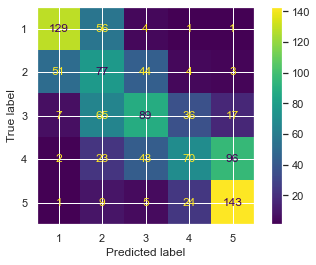

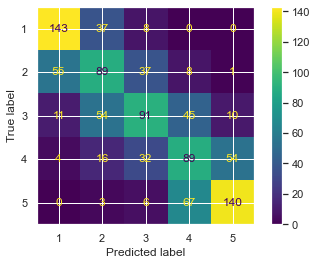

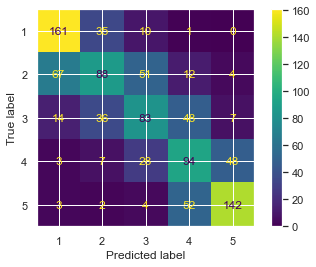

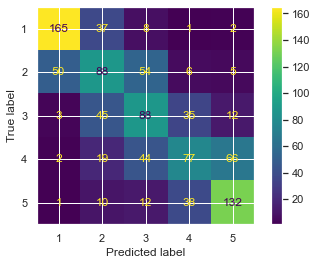

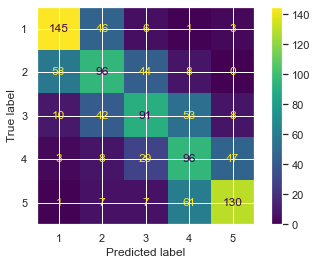

Average Accuracy: 0.5471999999999999


In [17]:
# Fit model using all the training fold and validation fold

tot_accuracy = []


for i in range(0,5):
    X_train = np.concatenate((train_data_folds[i][0], validation_data_folds[i][0]), axis= 0)
    Y_train = np.concatenate((train_data_folds[i][1], validation_data_folds[i][1]), axis= 0)
    X_test = test_data_folds[i][0]
    Y_test = test_data_folds[i][1]
    
    # Learn using the other two folds not used for testing 
    mnnb = MultinomialNB(alpha=best_alpha, fit_prior=True, class_prior=None)
    mnnb.fit(X_train, Y_train)
    
    predicted = mnnb.predict(X_test)
    accuracy = accuracy_score(Y_test, predicted)
    
    # Graph Confusion Matrix for Each Run:
    disp = plot_confusion_matrix(mnnb, X_test, Y_test, display_labels=[1,2,3,4,5])
    pyplot.show()
    counter += 1
    
    tot_accuracy.append(accuracy)
mnnb_accuracy = sum(tot_accuracy)/len(tot_accuracy)    
print(f'Average Accuracy: {sum(tot_accuracy)/len(tot_accuracy)}')

# iii) Logistic Regression

In [18]:
k_folds = 5
test_data_folds = []
train_data_folds = []
validation_data_folds = []

kf = sklms.KFold(n_splits=5, shuffle=True)
kf.get_n_splits(X)
c_vals = [1, 1.5, 2, 2.5, 3, 3.5]
counter = 0

logistic_values = []
for train_index, validation_index in kf.split(X):
    
    # SPLITTING LOGIC
    X_train, X_test = X[train_index], X[validation_index]
    Y_train, Y_test = Y[train_index], Y[validation_index]
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=1)
    test_data_folds.append((X_test, Y_test))
    train_data_folds.append((X_train, Y_train))
    validation_data_folds.append((X_val, Y_val))
    
    # MODEL TRAINING
    logistic = LogisticRegression(penalty='l1', C=c_vals[counter], multi_class='ovr', solver='liblinear',tol= 0.01)
    logistic.fit(X_train, Y_train)
    
    # VALIDATION RESULTS
    predicted = logistic.predict(X_val)
    confu_matrix = confusion_matrix(Y_val, predicted)
    accuracy = accuracy_score(Y_val, predicted)
    logistic_values.append((accuracy, c_vals[counter]))
    print(f'Iteration {counter + 1} with C: {c_vals[counter]} Complete')
    print(f'Accuracy : {accuracy}')
    
    counter += 1

Iteration 1 with C: 1 Complete
Accuracy : 0.5
Iteration 2 with C: 1.5 Complete
Accuracy : 0.5158333333333334
Iteration 3 with C: 2 Complete
Accuracy : 0.5166666666666667
Iteration 4 with C: 2.5 Complete
Accuracy : 0.52
Iteration 5 with C: 3 Complete
Accuracy : 0.5491666666666667


**Logistic Regression NOTES**


`LogisticRegression(penalty='l1', C=C_values[counter], multi_class='ovr', solver='liblinear',tol= 0.01, n_jobs=-1,)`
- penalty_term: I used L1 penalty because the data is very sparse, and finding relevant features to classify is important 
- C-values (tuning param) not on the 1-norm, but the loss, this is opposite of class, so lower the values, the more szeroes the coeff gets, tuning this variable
- multi-class -> One vs Rest strategy
- solver -> Used liblinear as it supports ovr and l1 penalty
- tol/max_iter -> I had to increase tolerance for convergence

In [19]:
accuracy, best_c = max(logistic_values, key = lambda i : i[0])
print(f'Best Accuracy: {accuracy}\nBest C(Penalty Term) : {best_c}')

Best Accuracy: 0.5491666666666667
Best C(Penalty Term) : 3


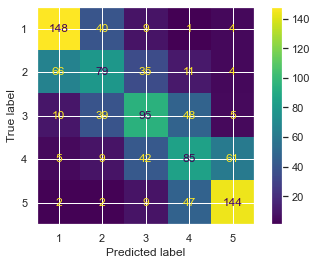

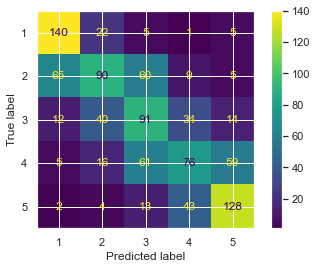

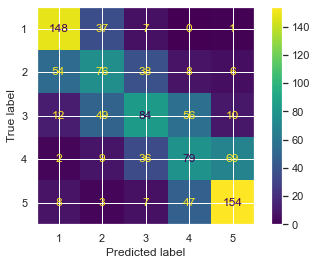

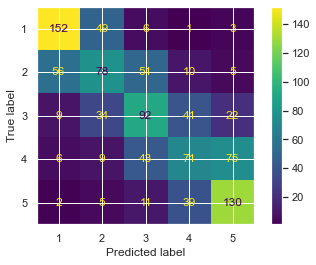

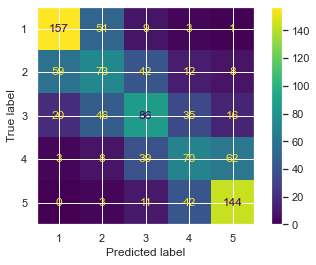

Average Accuracy: 0.534


In [20]:
# Fit model using all the training fold and validation fold

tot_accuracy = []


for i in range(0,5):
    X_train = np.concatenate((train_data_folds[i][0], validation_data_folds[i][0]), axis= 0)
    Y_train = np.concatenate((train_data_folds[i][1], validation_data_folds[i][1]), axis= 0)
    X_test = test_data_folds[i][0]
    Y_test = test_data_folds[i][1]
    
    # Learn using the other two folds not used for testing 
    logistic = LogisticRegression(penalty='l1', C=best_c, multi_class='ovr', solver='liblinear',tol= 0.01)
    logistic.fit(X_train, Y_train)
    
    predicted = logistic.predict(X_test)
    accuracy = accuracy_score(Y_test, predicted)
    
    # Graph Confusion Matrix for Each Run:
    disp = plot_confusion_matrix(logistic, X_test, Y_test, display_labels=[1,2,3,4,5])
    pyplot.show()
    counter += 1
    
    tot_accuracy.append(accuracy)
logistic_accuracy = sum(tot_accuracy)/len(tot_accuracy)     
print(f'Average Accuracy: {sum(tot_accuracy)/len(tot_accuracy)}')

 # e) Comparative Analysis

In [21]:
accuracy_list = [linear_svc_accuracy, mnnb_accuracy, logistic_accuracy]
models = [linear_svc, mnnb, logistic ]
for accuracy, model in zip(accuracy_list, models):
    print(f'Model: {model} Accuracy: {accuracy}')

Model: LinearSVC(C=0.5, loss='hinge') Accuracy: 0.528
Model: MultinomialNB(alpha=0.5) Accuracy: 0.5471999999999999
Model: LogisticRegression(C=3, multi_class='ovr', penalty='l1', solver='liblinear',
                   tol=0.01) Accuracy: 0.534


Discussion:
    (Confusion Matrix printed above for each of the 5)
   - Interestingly enough classes 1,5 were the best classified throughout all the methods which made sense given the data (People who are more likely to review have (strong/frequent words) are the ratings that are really good. The middle 3 columns are the ones that had trouble classifying and its most likely because the ratngs and the text are similar. 
   - I think if the middle three columns were grouped together, then there would be a better classification.
   
 Recommendation: 
  - I would pick Multinomial Naive Bayes bc it has the lowest ratio

# f) Ethical Issues

- The ethical issues related to this dataset would have to do with the things people are saying in the reviews and how they can be classified as something very good (5) or very bad(1). I think it is very hard to control the type of input the model is recieveing and certian tokens/word vectors might be inappropriate and end up being trained poorly because the input has not been sanitized. I think another factor is the number of samples and who is actually reviewing the trip advisor. There can be paid sponsors that skew the data, so not knowing who is writing these reviews and there can be a lot of noise in the data that could essentially classify a review as 1/5 without proper training details. 

# g) Bibliography

 - Li, Susan. “Multi-Class Text Classification with Scikit-Learn.” Medium, Towards Data Science, 20 Feb. 2018, towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f. 
- Purva Huilgol “BoW Model and TF-IDF For Creating Feature From Text.” Analytics Vidhya, 25 June 2020, www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/. 
- “Sklearn.naive_bayes.MultinomialNB¶.” Scikit, scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html. 